In [2]:
# Links
# [7] https://en.wikipedia.org/wiki/Mobile_country_code

In [1]:
# Libraries
import pandas as pd
from random import randint
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import skew
from IPython.display import Image

In [2]:
## Loading the previous dataset with all transformations before smallest and largest analysis.
dataset = pd.read_csv('df2.csv')

In [5]:
dataset.head()

,Unnamed: 0,Square_id,Time_Interval,Country_code,Internet
0,1,1,1383260400000,39,11.028366
1,4,1,1383261000000,39,11.100963
2,6,1,1383261600000,39,10.892771
3,8,1,1383262200000,39,8.622425
4,10,1,1383262800000,39,8.009927


In [8]:
dataset.drop('Unnamed: 0', axis =1)

,Square_id,Time_Interval,Country_code,Internet
0,1,1383260400000,39,11.028366
1,1,1383261000000,39,11.100963
2,1,1383261600000,39,10.892771
3,1,1383262200000,39,8.622425
4,1,1383262800000,39,8.009927
...,...,...,...,...
1439976,9999,1383343800000,39,21.370823
1439977,9999,1383344400000,39,21.788302
1439978,9999,1383345000000,39,19.047994
1439979,9999,1383345600000,39,16.453566


In [ ]:
# Now we have to load the dataset from opencellID and the Milan geocoordinates.

In [9]:
opencellID = pd.read_csv('cell_towers.csv')

In [10]:
opencellID.head()

,radio,mcc,net,area,cell,unit,lon,lat,range,samples,changeable,created,updated,averageSignal
0,UMTS,262,2,801,86355,0,13.285512,52.522202,1000,7,1,1282569574,1300155341,0
1,GSM,262,2,801,1795,0,13.276907,52.525714,5716,9,1,1282569574,1300155341,0
2,GSM,262,2,801,1794,0,13.285064,52.524000,6280,13,1,1282569574,1300796207,0
3,UMTS,262,2,801,211250,0,13.285446,52.521744,1000,3,1,1282569574,1299466955,0
4,UMTS,262,2,801,86353,0,13.293457,52.521515,1000,2,1,1282569574,1291380444,0


# Cleaning Stage

In [ ]:
# let's check any NaN values

In [15]:
opencellID.isnull().values.any()

False

In [ ]:
## That's great! No NaN values. We can proceed with the cleaning stage.

In [ ]:
# First we need to get only the columns required, that is MCC, net lon and lat

In [19]:
opencell01 = opencellID.iloc[:,[1,2,6,7]]

In [20]:
opencell01.head()

,mcc,net,lon,lat
0,262,2,13.285512,52.522202
1,262,2,13.276907,52.525714
2,262,2,13.285064,52.524000
3,262,2,13.285446,52.521744
4,262,2,13.293457,52.521515


In [21]:
# Now it's time to get only the cell towers (antennas) located in Italy. You can get the number at:
# https://en.wikipedia.org/wiki/Mobile_country_code [7]
opencell02 = opencell01[opencell01['mcc'] == 222]

In [ ]:
# Taking the MNC (Mobile Network Code) of TIM [7] 

In [23]:
opencell03 = opencell02[(opencell02['net'] == 1) | (opencell02['net'] == 43) | (opencell02['net'] == 48)]

In [25]:
opencell03

,mcc,net,lon,lat
25383,222,1,8.904054,44.907932
25385,222,1,8.908879,44.911198
25392,222,1,8.886124,44.917660
25393,222,1,8.924581,44.930649
25396,222,1,8.924606,44.930649
...,...,...,...,...
44392049,222,1,10.948038,45.854881
44392686,222,1,16.416710,41.279175
44392687,222,1,16.416702,41.279182
44392688,222,1,16.416702,41.279182


We have so far all the antennas of Italy that TIM operates. It is required to filter data to within boundaries of Milan Squares. 

In [3]:
# Milan Geocoordinates:
Milan = pd.read_csv('MilanoCoordinatesbi.csv')

In [27]:
Milan.head()

,Unnamed: 0,cellID,CoodX,CoordY
0,1,1,9.012991,45.357743
1,2,2,9.015991,45.357743
2,3,3,9.018992,45.357743
3,4,4,9.021992,45.357742
4,5,5,9.024993,45.357741


In [30]:
# We get the minimum and maximum values of CoodX and CoordY to set the boundaries.
minX = min(Milan['CoodX'])
maxX = max(Milan['CoodX'])
minY = min(Milan['CoordY'])
MaxY = max(Milan['CoordY'])

In [31]:
# Now we set the limits
opencell04 = opencell03[(opencell03['lon'] <= maxX) & (opencell03['lon'] >= minX) & (opencell03['lat'] >= minY) & 
                        (opencell03['lat'] <= MaxY) ]

In [40]:
opencell04.reset_index(drop=True)

,mcc,net,lon,lat
0,222,1,9.287558,45.391740
1,222,1,9.296940,45.393917
2,222,1,9.042190,45.566670
3,222,1,9.027507,45.558138
4,222,1,9.038342,45.564941
...,...,...,...,...
20311,222,1,9.286805,45.495663
20312,222,1,9.269895,45.491861
20313,222,1,9.270427,45.492229
20314,222,1,9.269363,45.491493


In [42]:
# Now it's time to create an identifier for the base stations (or cell towers or RRH)
opencell04['cell_id'] = [x for x in range(0, len(opencell04))]

/home/nilton/anaconda3/envs/Jedi/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
opencell04

,mcc,net,lon,lat,cell_id
121255,222,1,9.287558,45.391740,0
121492,222,1,9.296940,45.393917,1
140368,222,1,9.042190,45.566670,2
140370,222,1,9.027507,45.558138,3
141943,222,1,9.038342,45.564941,4
...,...,...,...,...,...
44377886,222,1,9.286805,45.495663,20311
44377893,222,1,9.269895,45.491861,20312
44377894,222,1,9.270427,45.492229,20313
44377895,222,1,9.269363,45.491493,20314


With the latitude and longitude of cell towers and square centers, we can create an algorithm based on Euclidean distance to find the closest tower for square centers.

In [44]:
# Checkpoint
opencell04.to_csv('opencell04.csv')

In [4]:
opencell04 = pd.read_csv('opencell04.csv')

In [19]:
opencell04 = opencell04.drop(['Unnamed: 0'], axis = 1)

In [44]:
opencell04.head()

,mcc,net,lon,lat,cell_id
0,222,1,9.287558,45.391740,0
1,222,1,9.296940,45.393917,1
2,222,1,9.042190,45.566670,2
3,222,1,9.027507,45.558138,3
4,222,1,9.038342,45.564941,4


So far, we have processed the dataset from OpenCell to extract the coordinates from cell towers. The next goal is to link every square in Milan with cell towers. To do so, we need: 
1-Fill in the data from Milan and cell towers into different lists to compare euclidean distances. 
2-Create a class to hold the association between cell tower and square. 
3- Create an euclidean distance (E.D) function. 
4- Initialize the class that will hold the associated lists. 
5-Calculate the E.D. between one cell tower and every square (for all cell towers). 
6-Compare the current E.D with the previous calculated in order to find the smallest one. 
7-Update the class with the association (square-cell). 
8-Create the dataset with the final results.


STEP 1 and 2: Fill the data from Milan and cell towers in different lists to compare euclidean distances; Create a class to hold the association between cell tower and square

Let's create one class to hold the RRH's and squares centers coordinates.

In [28]:
class Data:
    def __init__(self, id_cod, x, y):
        self.x = x
        self.y = y
        self.id = id_cod

Now we neet to create the class that will hold the square and RRH (cell tower).

In [29]:
class Clustering:
    def __init__(self, DE, id_base, id_square):
        self.de = DE # Euclidean Distance
        self.id_rrh = id_base #
        self.id_square = id_square
        
    def setDe(self, de):
        self.de = de
    
    def setids (self, id_base):
        self.id_rrh = id_base

Let's create a function to fill the cell towers and Square

In [30]:
def fill_data(dataset):
    lista = []
    for i in range(0, len(dataset)):
        aux = Data(dataset.iloc[i].cell_id, dataset.iloc[i].lon, dataset.iloc[i].lat)
        lista.append(aux)
    return lista

It's required to rename columns CoodX and CoordY to fit into the method fill_data

In [17]:
Milan = Milan.drop(['Unnamed: 0'], axis = 1)

In [24]:
Milan.columns = ['cell_id','lon','lat']

In [25]:
Milan.head()

,cell_id,lon,lat
0,1,9.012991,45.357743
1,2,9.015991,45.357743
2,3,9.018992,45.357743
3,4,9.021992,45.357742
4,5,9.024993,45.357741


In [31]:
# Filing the cell_towers
cell_towers = fill_data(opencell04)

In [37]:
# Filling the squares
squares = fill_data(Milan)

STEP 3: Create a euclidean distance (E.D) function

In [40]:
# Algorithm for euclidean distance
def Euclidean_distance(x1,y1,x2,y2):
    return np.sqrt(np.power((x1 - x2),2) + np.power((y1 - y2), 2))

In [41]:
# Testing
Euclidean_distance(1,1,2,2)

1.4142135623730951

Now it's time to fill the euclidean distances. But first, we need to initialize the comparison factor

STEP 4: Initialize the class that will hold the association

In [42]:
cluster = []
for i in range(0,len(squares)):
    init_answer = Clustering(Euclidean_distance(0,0,1000,1000),-1,i+1)
    cluster.append(init_answer)

STEP 5,6,7: Calculate the E.D between one cell tower and every square; Compare the current E.D with the previous calculated in order to find the smallest one; Update the class with the association (square-cell)

In [47]:
for i in range(0,len(cell_towers)):
    for j in range(0, len(squares)):
        x = Euclidean_distance(squares[j].x,squares[j].y, cell_towers[i].x, cell_towers[i].y)
        if x < cluster[j].de:
            cluster[j].setDe(x)
            cluster[j].setids(cell_towers[i].id)

Let's create the new dataset with cell_towers associated with squares

STEP 8: Create the dataset with the final results.

In [48]:
Square_id = [cluster[x].id_square for x in range(0, len(cluster))]

In [51]:
RRH = [cluster[x].id_rrh for x in range(0, len(cluster))]

In [52]:
df3 = pd.DataFrame({'RRH':RRH, 'Square_id': Square_id})

In [53]:
df3

,RRH,Square_id
0,779.0,1
1,779.0,2
2,15335.0,3
3,15335.0,4
4,15335.0,5
...,...,...
9995,9377.0,9996
9996,8411.0,9997
9997,9514.0,9998
9998,12779.0,9999


In [54]:
df3.to_csv('cellvsquare.csv')

In [ ]:
# Merging with the dataset of squares.

In [56]:
df4 = pd.merge(dataset,df3, on = 'Square_id')

In [57]:
df4.head()

,Unnamed: 0,Square_id,Time_Interval,Country_code,Internet,RRH
0,1,1,1383260400000,39,11.028366,779.0
1,4,1,1383261000000,39,11.100963,779.0
2,6,1,1383261600000,39,10.892771,779.0
3,8,1,1383262200000,39,8.622425,779.0
4,10,1,1383262800000,39,8.009927,779.0


In [58]:
df4 = df4.drop(['Unnamed: 0'], axis = 1)

In [60]:
df4

,Square_id,Time_Interval,Country_code,Internet,RRH
0,1,1383260400000,39,11.028366,779.0
1,1,1383261000000,39,11.100963,779.0
2,1,1383261600000,39,10.892771,779.0
3,1,1383262200000,39,8.622425,779.0
4,1,1383262800000,39,8.009927,779.0
...,...,...,...,...,...
1439976,9999,1383343800000,39,21.370823,12779.0
1439977,9999,1383344400000,39,21.788302,12779.0
1439978,9999,1383345000000,39,19.047994,12779.0
1439979,9999,1383345600000,39,16.453566,12779.0


In [61]:
# Checkpoint for the final dataset.
df4.to_csv('df4.csv')

In [62]:
# Verifying if there is any NULL value
df4.isnull().values.any()

False

In [63]:
# Getting the changes used in the previous source code (Source01) 
def applying_changes(dataset2):
    dataset = dataset2.copy()
    dataset['Traffic_MB'] = dataset['Internet']*5000
    dataset['Traffic_Gbps'] = dataset['Traffic_MB']/(125*600)
    return dataset

In [64]:
df5 = applying_changes(df4)

In [67]:
df5

,Square_id,Time_Interval,Country_code,Internet,RRH,Traffic_MB,Traffic_Gbps
0,1,1383260400000,39,11.028366,779.0,55141.831908,0.735224
1,1,1383261000000,39,11.100963,779.0,55504.817257,0.740064
2,1,1383261600000,39,10.892771,779.0,54463.853014,0.726185
3,1,1383262200000,39,8.622425,779.0,43112.122955,0.574828
4,1,1383262800000,39,8.009927,779.0,40049.637312,0.533995
...,...,...,...,...,...,...,...
1439976,9999,1383343800000,39,21.370823,12779.0,106854.112528,1.424722
1439977,9999,1383344400000,39,21.788302,12779.0,108941.512072,1.452553
1439978,9999,1383345000000,39,19.047994,12779.0,95239.968977,1.269866
1439979,9999,1383345600000,39,16.453566,12779.0,82267.827786,1.096904


In [65]:
# Other lambda functions used to transform fronthaul_traffic
fronthaul_band = lambda x: x*(100/20)*(8/6)*(8/2) # X in Mbps
Gbps_Mbps = lambda x: x*1000
Mbps_Gbps = lambda x: x/1000

# Finding the first answer: How many cells towers can share the same link?

In [68]:
# Firstly, we need to transform traffic in Gbps to Mbps:
df5['Traffic_Mbps'] = list(map(Gbps_Mbps,df5['Traffic_Gbps']))

In [69]:
# Then, we need to calculate the fronthaul bandwidth required
df5['Traffic_fronthaul'] = list(map(fronthaul_band,df5['Traffic_Mbps']))

In [70]:
# Now we get the fronthaul in Gbps
df5['Fronthaul_Gbps'] = list(map(Mbps_Gbps,df5['Traffic_fronthaul']))

In [71]:
df5.head()

,Square_id,Time_Interval,Country_code,Internet,RRH,Traffic_MB,Traffic_Gbps,Traffic_Mbps,Traffic_fronthaul,Fronthaul_Gbps
0,1,1383260400000,39,11.028366,779.0,55141.831908,0.735224,735.224425,19605.984679,19.605985
1,1,1383261000000,39,11.100963,779.0,55504.817257,0.740064,740.064230,19735.046136,19.735046
2,1,1383261600000,39,10.892771,779.0,54463.853014,0.726185,726.184707,19364.925516,19.364926
3,1,1383262200000,39,8.622425,779.0,43112.122955,0.574828,574.828306,15328.754828,15.328755
4,1,1383262800000,39,8.009927,779.0,40049.637312,0.533995,533.995164,14239.871044,14.239871


In [ ]:
# We need to get the highest traffic to analyze if combined they can surpass 32 Tbps!

In [81]:
df5.groupby('RRH')['Fronthaul_Gbps'].sum().nlargest(10).reset_index()

,RRH,Fronthaul_Gbps
0,20122.0,414210.509030
1,20124.0,280457.422103
2,20209.0,225530.388453
3,351.0,214227.147949
4,3491.0,204875.925058
5,3494.0,192796.390632
6,1098.0,191458.955369
7,14798.0,185031.131786
8,3283.0,181526.728365
9,18716.0,179408.643760


In [ ]:
# Let's starting with the top three

In [91]:
r1 = df5[(df5['RRH'] == 20122) | (df5['RRH'] == 20124) | (df5['RRH'] == 20209)]

In [92]:
r1

,Square_id,Time_Interval,Country_code,Internet,RRH,Traffic_MB,Traffic_Gbps,Traffic_Mbps,Traffic_fronthaul,Fronthaul_Gbps
649728,5059,1383260400000,39,527.910848,20124.0,2.639554e+06,35.194057,35194.056555,9.385082e+05,938.508175
649729,5059,1383261000000,39,645.207406,20124.0,3.226037e+06,43.013827,43013.827069,1.147035e+06,1147.035388
649730,5059,1383261600000,39,569.782389,20124.0,2.848912e+06,37.985493,37985.492628,1.012946e+06,1012.946470
649731,5059,1383262200000,39,800.599594,20124.0,4.002998e+06,53.373306,53373.306254,1.423288e+06,1423.288167
649732,5059,1383262800000,39,515.949492,20124.0,2.579747e+06,34.396633,34396.632781,9.172435e+05,917.243541
...,...,...,...,...,...,...,...,...,...,...
761601,5758,1383343800000,39,974.554935,20209.0,4.872775e+06,64.970329,64970.329000,1.732542e+06,1732.542107
761602,5758,1383344400000,39,847.854454,20209.0,4.239272e+06,56.523630,56523.630238,1.507297e+06,1507.296806
761603,5758,1383345000000,39,1024.161327,20209.0,5.120807e+06,68.277422,68277.421799,1.820731e+06,1820.731248
761604,5758,1383345600000,39,1013.121081,20209.0,5.065605e+06,67.541405,67541.405429,1.801104e+06,1801.104145


In [ ]:
#Let's combine the by time. But first, we need to transform.

In [93]:
def convert_time(dataset2):
    dataset = dataset2.copy()
    minuto = 0.0
    hora = 0.0
    horario = 0.0
    anterior = dataset.iloc[0,0]
    for i in range(0,dataset.shape[0]):
        if dataset.iloc[i,0] == anterior:
            horario = minuto + hora
            dataset.iat[i,1] = horario
            minuto += 0.10
            if minuto == 0.60:
                minuto = 0.0
                hora += 1.0
        else:
            horario = 0.0
            minuto = 0.0
            hora = 0.0
            dataset.iat[i,1] = horario
            minuto += 0.10
        anterior = dataset.iloc[i,0]
    return dataset

In [94]:
r1 = convert_time(r1)

In [96]:
r1

,Square_id,Time_Interval,Country_code,Internet,RRH,Traffic_MB,Traffic_Gbps,Traffic_Mbps,Traffic_fronthaul,Fronthaul_Gbps
649728,5059,0.0,39,527.910848,20124.0,2.639554e+06,35.194057,35194.056555,9.385082e+05,938.508175
649729,5059,0.1,39,645.207406,20124.0,3.226037e+06,43.013827,43013.827069,1.147035e+06,1147.035388
649730,5059,0.2,39,569.782389,20124.0,2.848912e+06,37.985493,37985.492628,1.012946e+06,1012.946470
649731,5059,0.3,39,800.599594,20124.0,4.002998e+06,53.373306,53373.306254,1.423288e+06,1423.288167
649732,5059,0.4,39,515.949492,20124.0,2.579747e+06,34.396633,34396.632781,9.172435e+05,917.243541
...,...,...,...,...,...,...,...,...,...,...
761601,5758,23.1,39,974.554935,20209.0,4.872775e+06,64.970329,64970.329000,1.732542e+06,1732.542107
761602,5758,23.2,39,847.854454,20209.0,4.239272e+06,56.523630,56523.630238,1.507297e+06,1507.296806
761603,5758,23.3,39,1024.161327,20209.0,5.120807e+06,68.277422,68277.421799,1.820731e+06,1820.731248
761604,5758,23.4,39,1013.121081,20209.0,5.065605e+06,67.541405,67541.405429,1.801104e+06,1801.104145


In [98]:
r2 = r1.groupby(['Time_Interval']).sum().reset_index()

In [99]:
r2

,Time_Interval,Square_id,Country_code,Internet,RRH,Traffic_MB,Traffic_Gbps,Traffic_Mbps,Traffic_fronthaul,Fronthaul_Gbps
0,0.0,15978,117,2138.563108,60455.0,1.069282e+07,142.570874,142570.873882,3.801890e+06,3801.889970
1,0.1,15978,117,2225.569047,60455.0,1.112785e+07,148.371270,148371.269774,3.956567e+06,3956.567194
2,0.2,15978,117,2426.326668,60455.0,1.213163e+07,161.755111,161755.111194,4.313470e+06,4313.469632
3,0.3,15978,117,2670.453233,60455.0,1.335227e+07,178.030216,178030.215505,4.747472e+06,4747.472413
4,0.4,15978,117,2298.497751,60455.0,1.149249e+07,153.233183,153233.183387,4.086218e+06,4086.218224
...,...,...,...,...,...,...,...,...,...,...
139,23.1,15978,117,2321.588177,60455.0,1.160794e+07,154.772545,154772.545155,4.127268e+06,4127.267871
140,23.2,15978,117,2065.734770,60455.0,1.032867e+07,137.715651,137715.651356,3.672417e+06,3672.417369
141,23.3,15978,117,2383.645267,60455.0,1.191823e+07,158.909684,158909.684492,4.237592e+06,4237.591586
142,23.4,15978,117,2073.567591,60455.0,1.036784e+07,138.237839,138237.839372,3.686342e+06,3686.342383


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


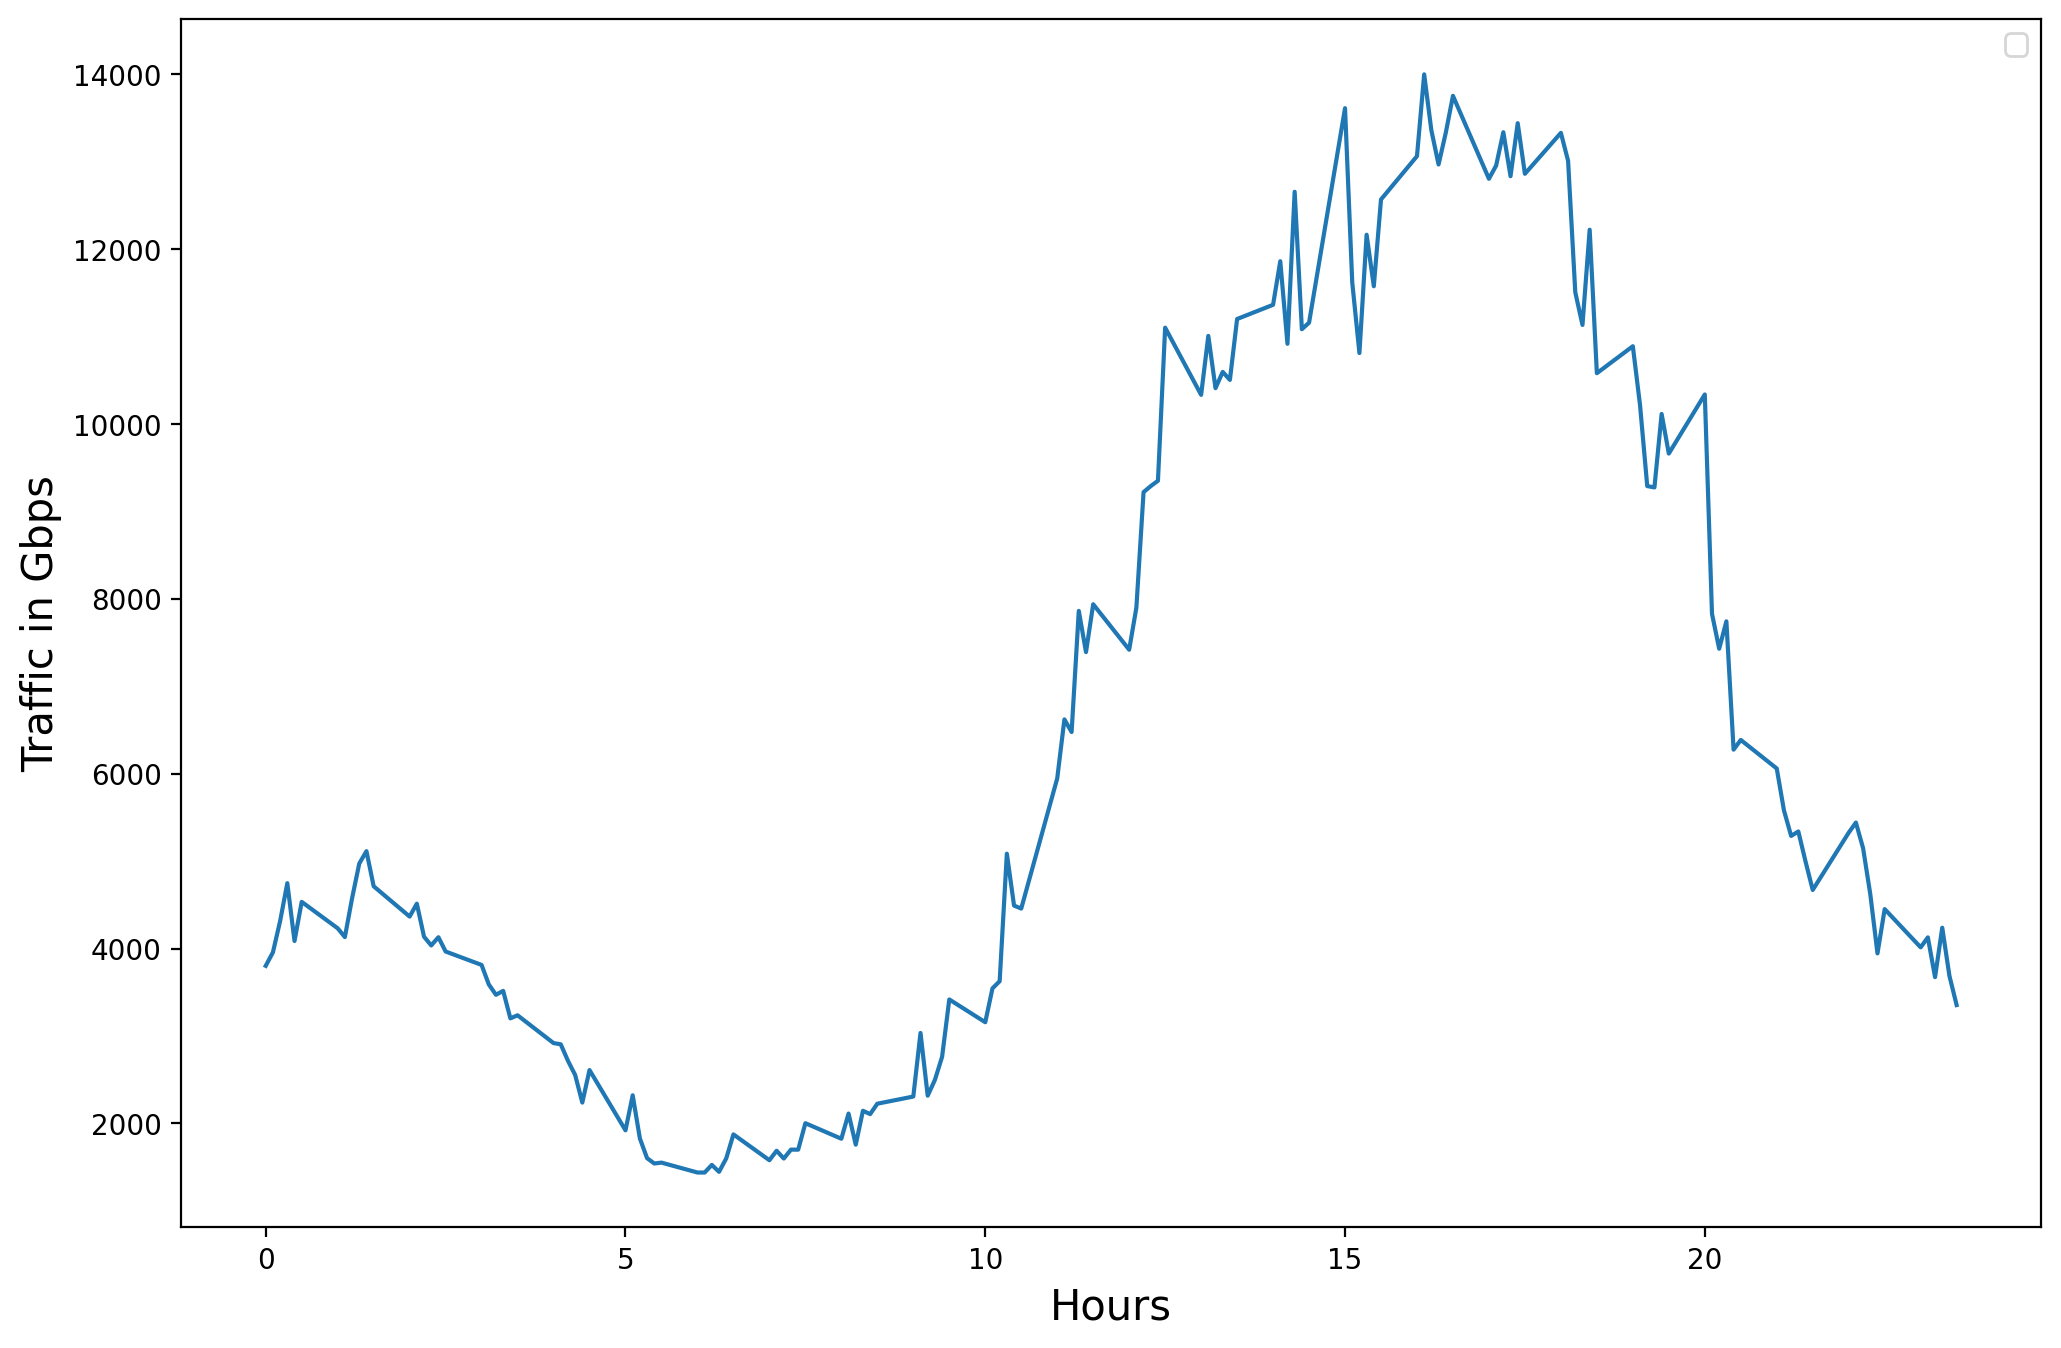

In [101]:
plt.figure(figsize=(12, 8), dpi = 200)
plt.plot(r2['Time_Interval'], r2['Fronthaul_Gbps'])
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Traffic in Gbps', fontsize = 15)
plt.legend()

In [ ]:
# The traffic reaches 14 Tbps! Almost half. Let's move on and find our ideal number.  Let's get the top 8!

In [102]:
r3 = df5[(df5['RRH'] == 20122) | (df5['RRH'] == 20124) | (df5['RRH'] == 20209) | (df5['RRH'] == 351) | 
         (df5['RRH'] == 3491)| (df5['RRH'] == 3494)| (df5['RRH'] == 1098)| (df5['RRH'] == 14798)]

In [105]:
r3 = convert_time(r3)

In [106]:
r4 = r3.groupby(['Time_Interval']).sum().reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


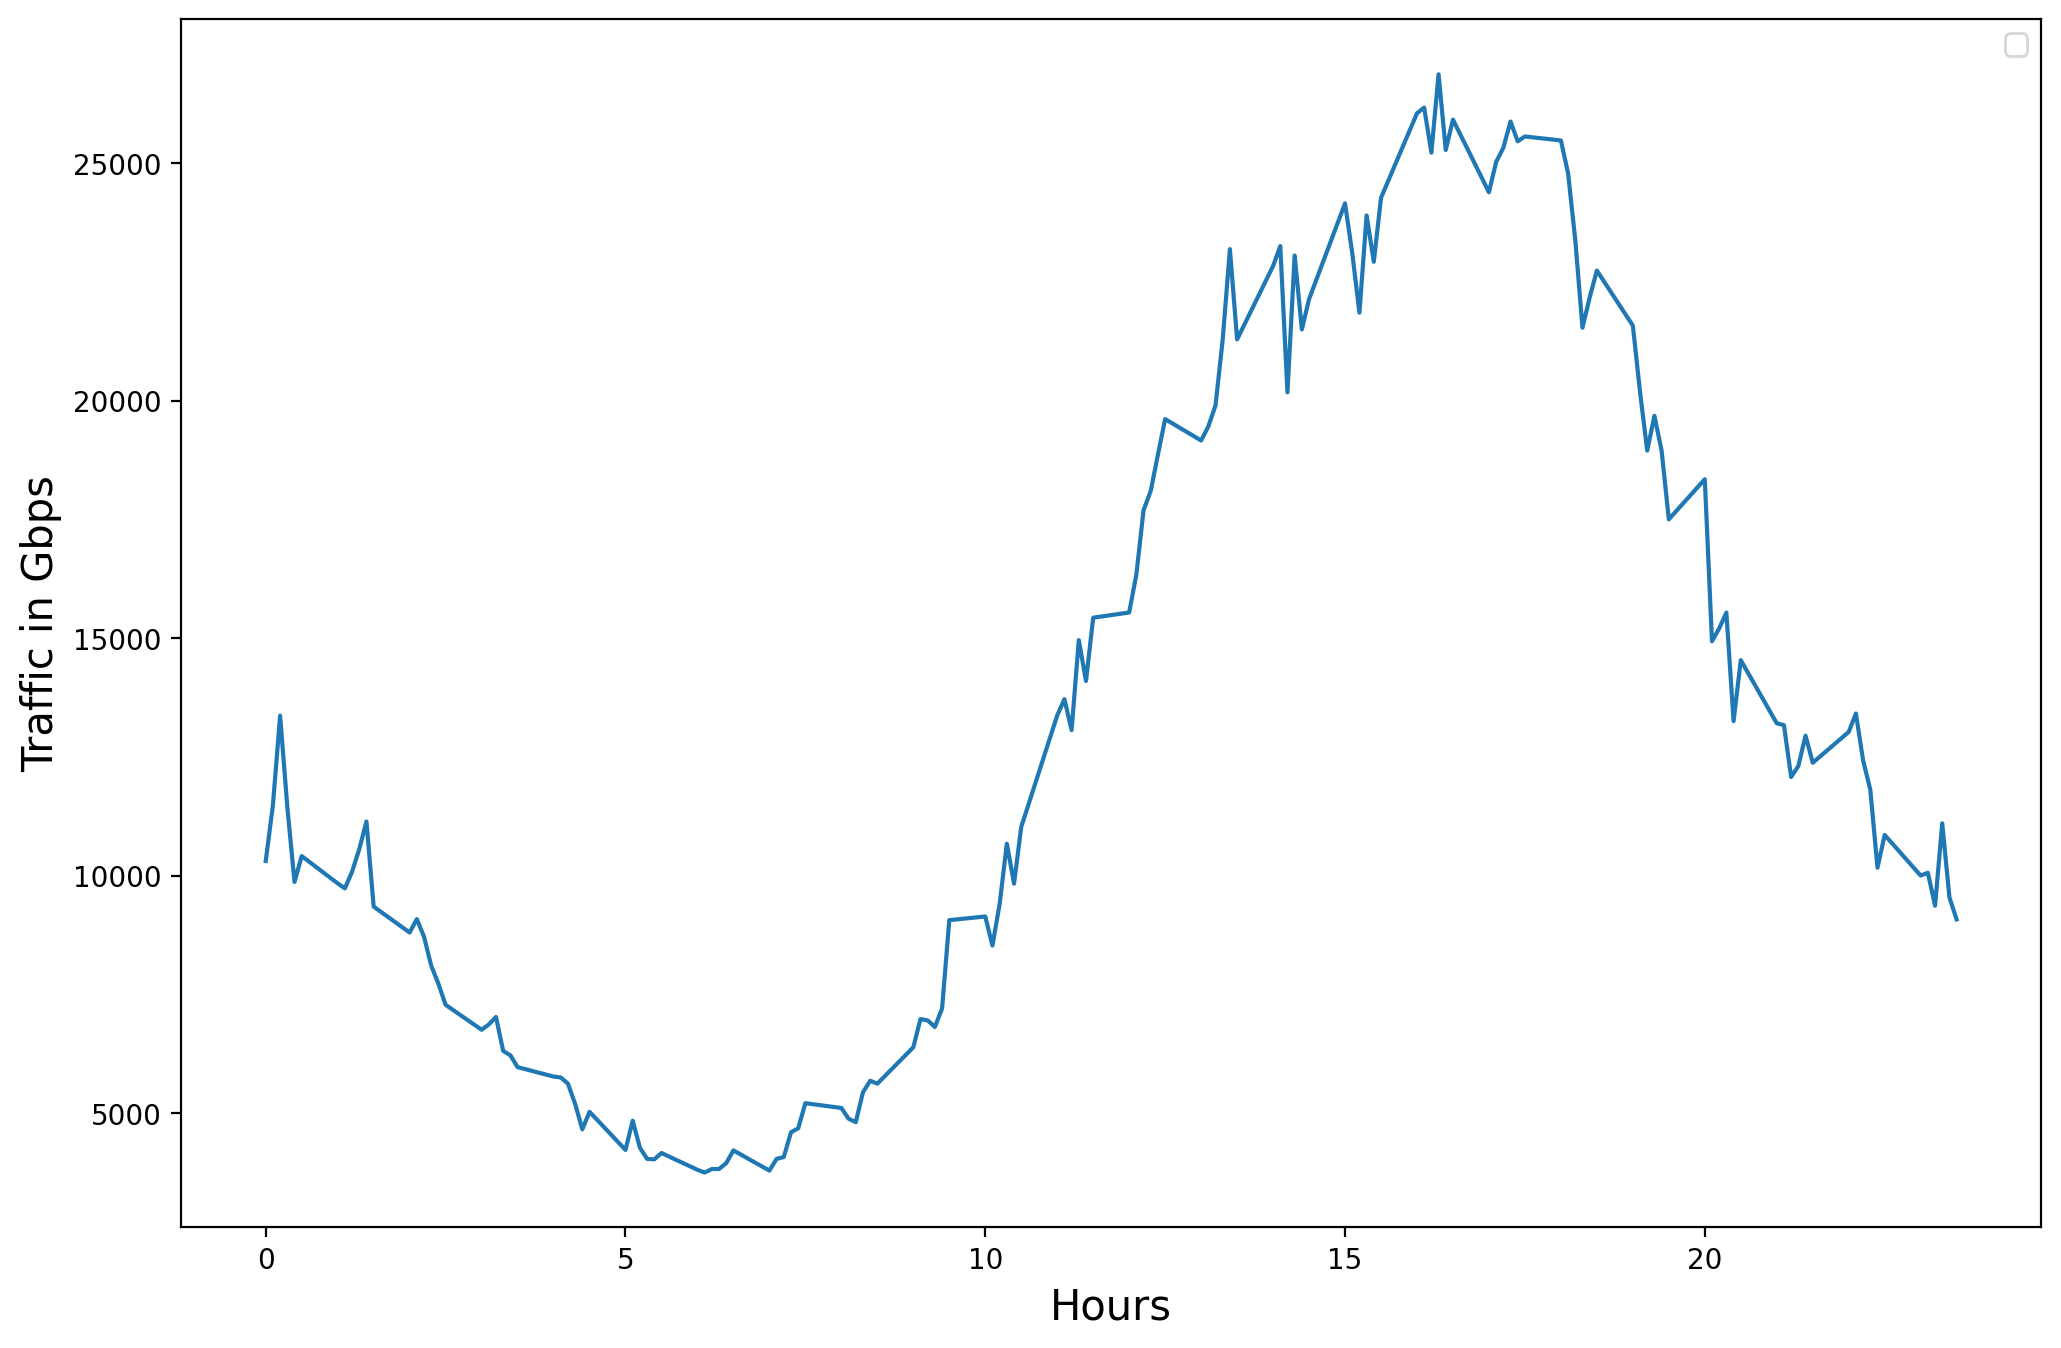

In [107]:
plt.figure(figsize=(12, 8), dpi = 200)
plt.plot(r4['Time_Interval'], r4['Fronthaul_Gbps'])
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Traffic in Gbps', fontsize = 15)
plt.legend()

In [ ]:
# Almost!

In [108]:
r5 = df5[(df5['RRH'] == 20122) | (df5['RRH'] == 20124) | (df5['RRH'] == 20209) | (df5['RRH'] == 351) | 
         (df5['RRH'] == 3491)| (df5['RRH'] == 3494)| (df5['RRH'] == 1098)| (df5['RRH'] == 14798) |
        (df5['RRH'] == 3283) | (df5['RRH'] == 18716)]

In [109]:
r5 = convert_time(r5)

In [110]:
r6 = r5.groupby(['Time_Interval']).sum().reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


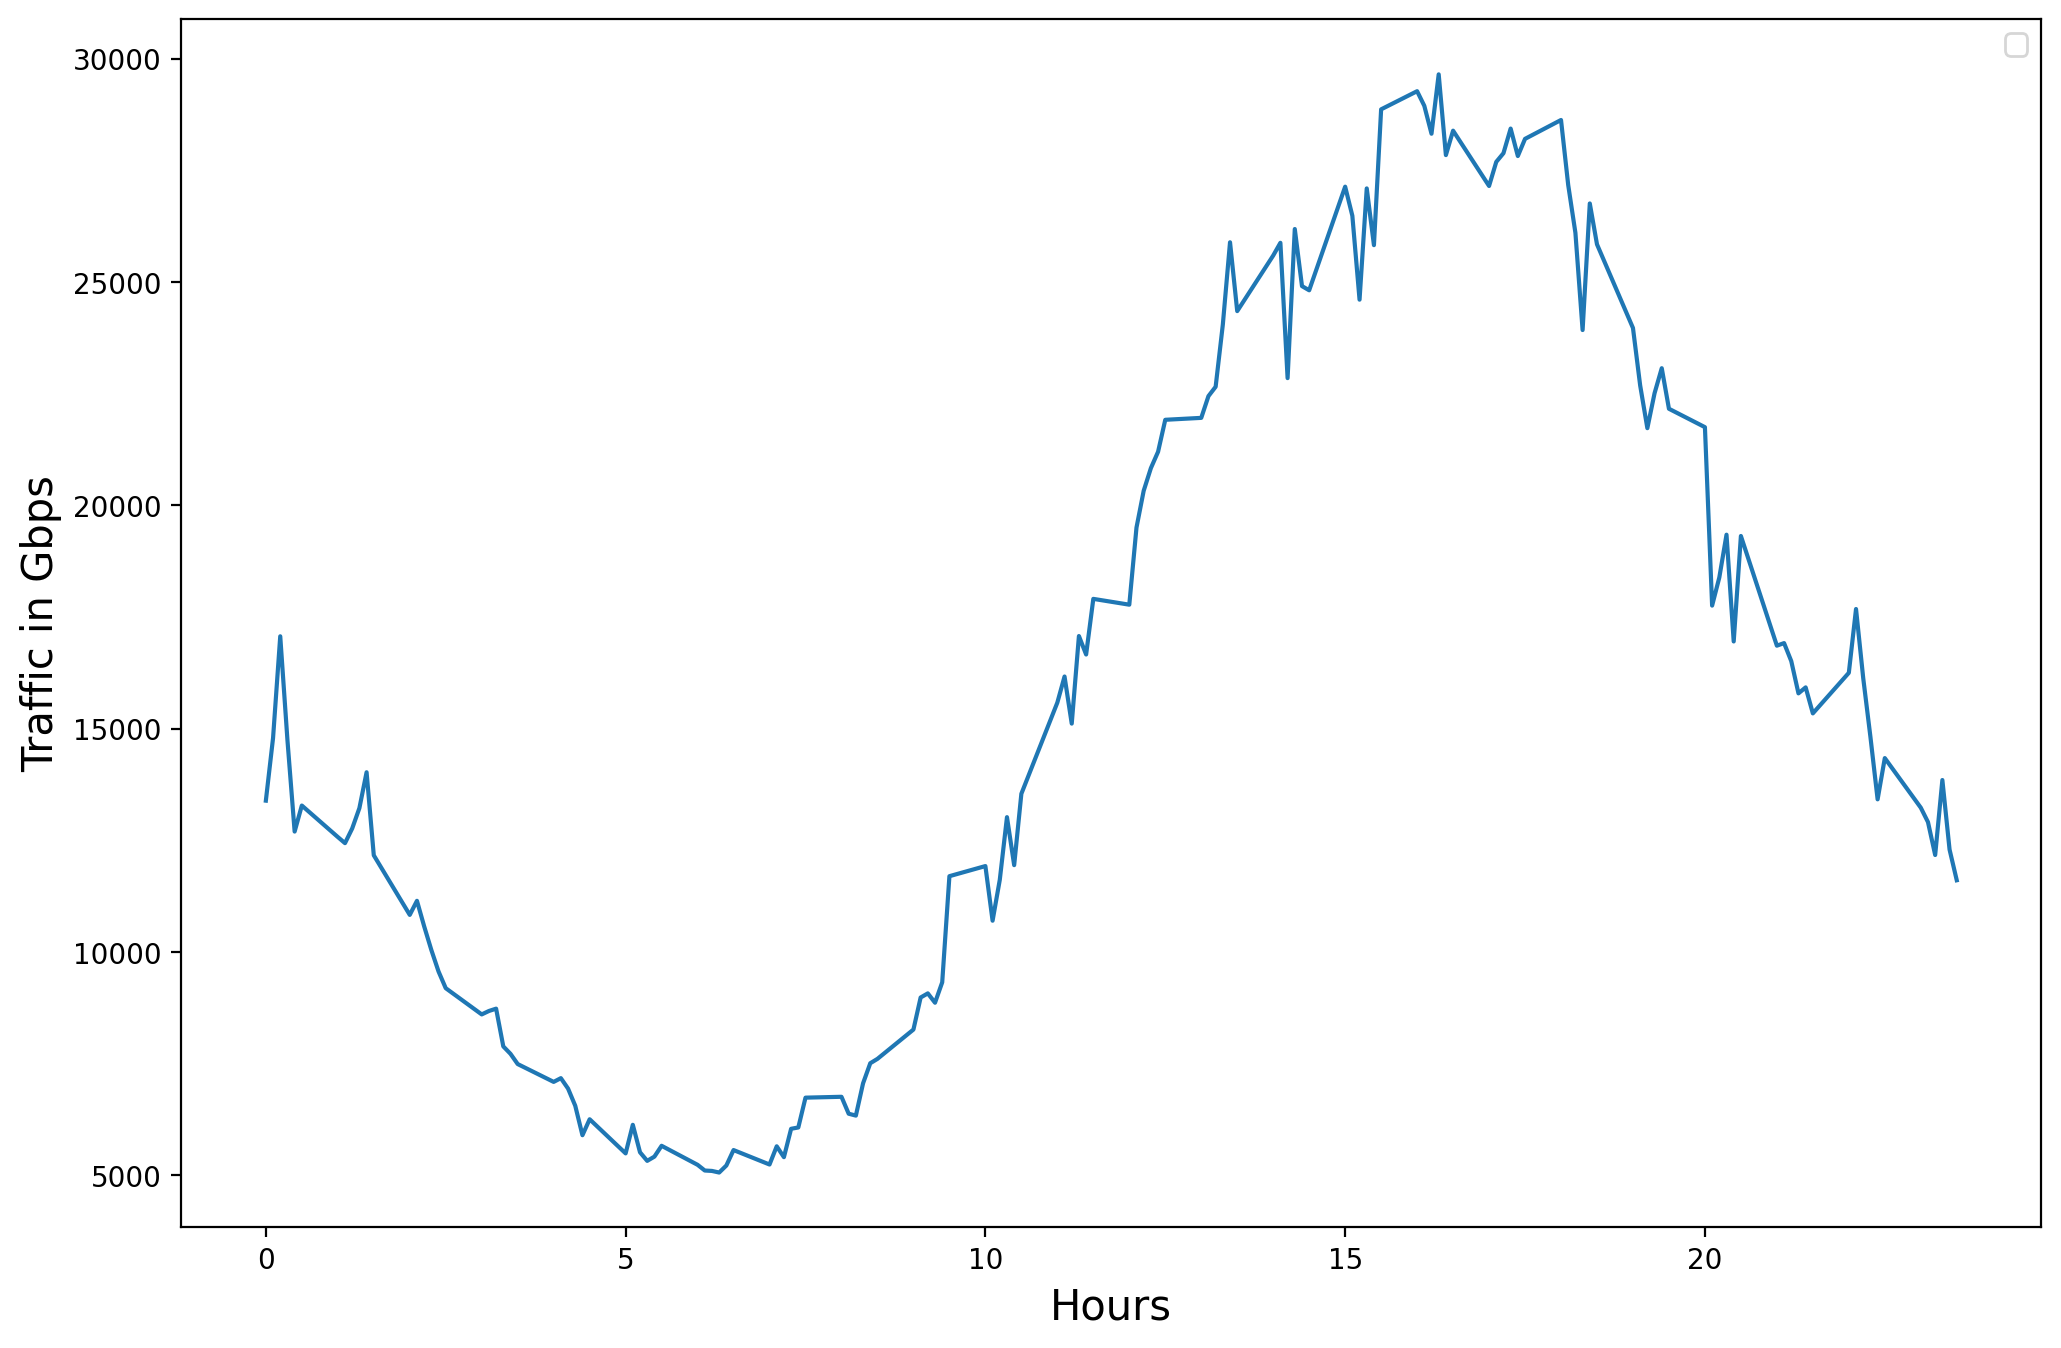

In [111]:
plt.figure(figsize=(12, 8), dpi = 200)
plt.plot(r6['Time_Interval'], r6['Fronthaul_Gbps'])
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Traffic in Gbps', fontsize = 15)
plt.legend()

In [118]:
df5.groupby('RRH')['Fronthaul_Gbps'].sum().nlargest(12).reset_index()

,RRH,Fronthaul_Gbps
0,20122.0,414210.509030
1,20124.0,280457.422103
2,20209.0,225530.388453
3,351.0,214227.147949
4,3491.0,204875.925058
5,3494.0,192796.390632
6,1098.0,191458.955369
7,14798.0,185031.131786
8,3283.0,181526.728365
9,18716.0,179408.643760


In [119]:
r7 = df5[(df5['RRH'] == 20122) | (df5['RRH'] == 20124) | (df5['RRH'] == 20209) | (df5['RRH'] == 351) | 
         (df5['RRH'] == 3491)| (df5['RRH'] == 3494)| (df5['RRH'] == 1098)| (df5['RRH'] == 14798) |
        (df5['RRH'] == 3283) | (df5['RRH'] == 18716) | (df5['RRH'] == 6675) | (df5['RRH'] == 18601)]

In [120]:
r7 = convert_time(r7)

In [121]:
r8 = r7.groupby(['Time_Interval']).sum().reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


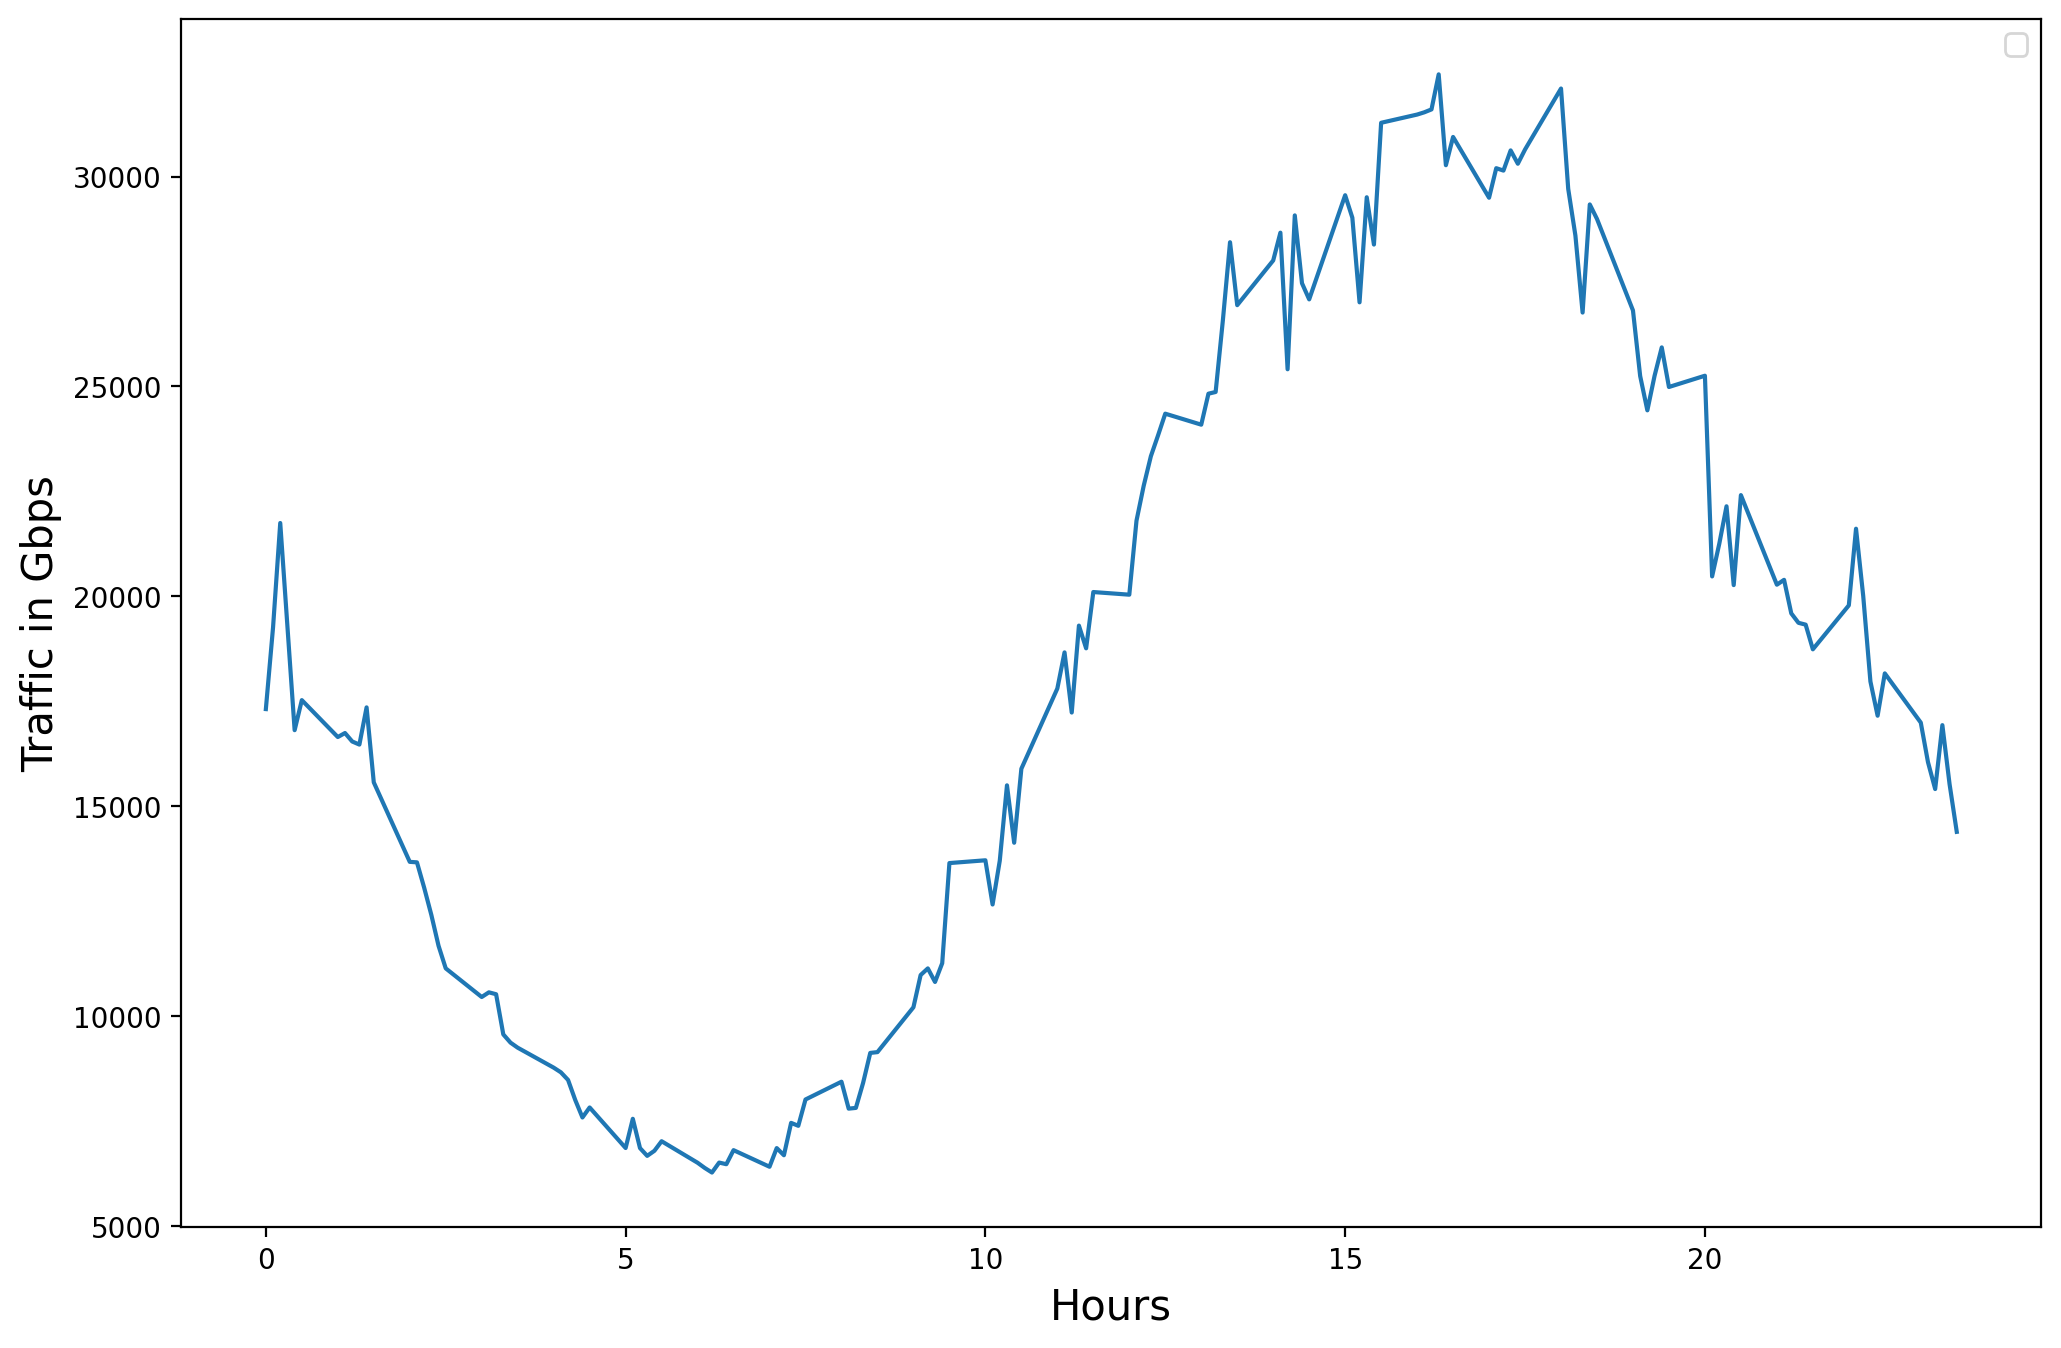

In [122]:
plt.figure(figsize=(12, 8), dpi = 200)
plt.plot(r8['Time_Interval'], r8['Fronthaul_Gbps'])
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Traffic in Gbps', fontsize = 15)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


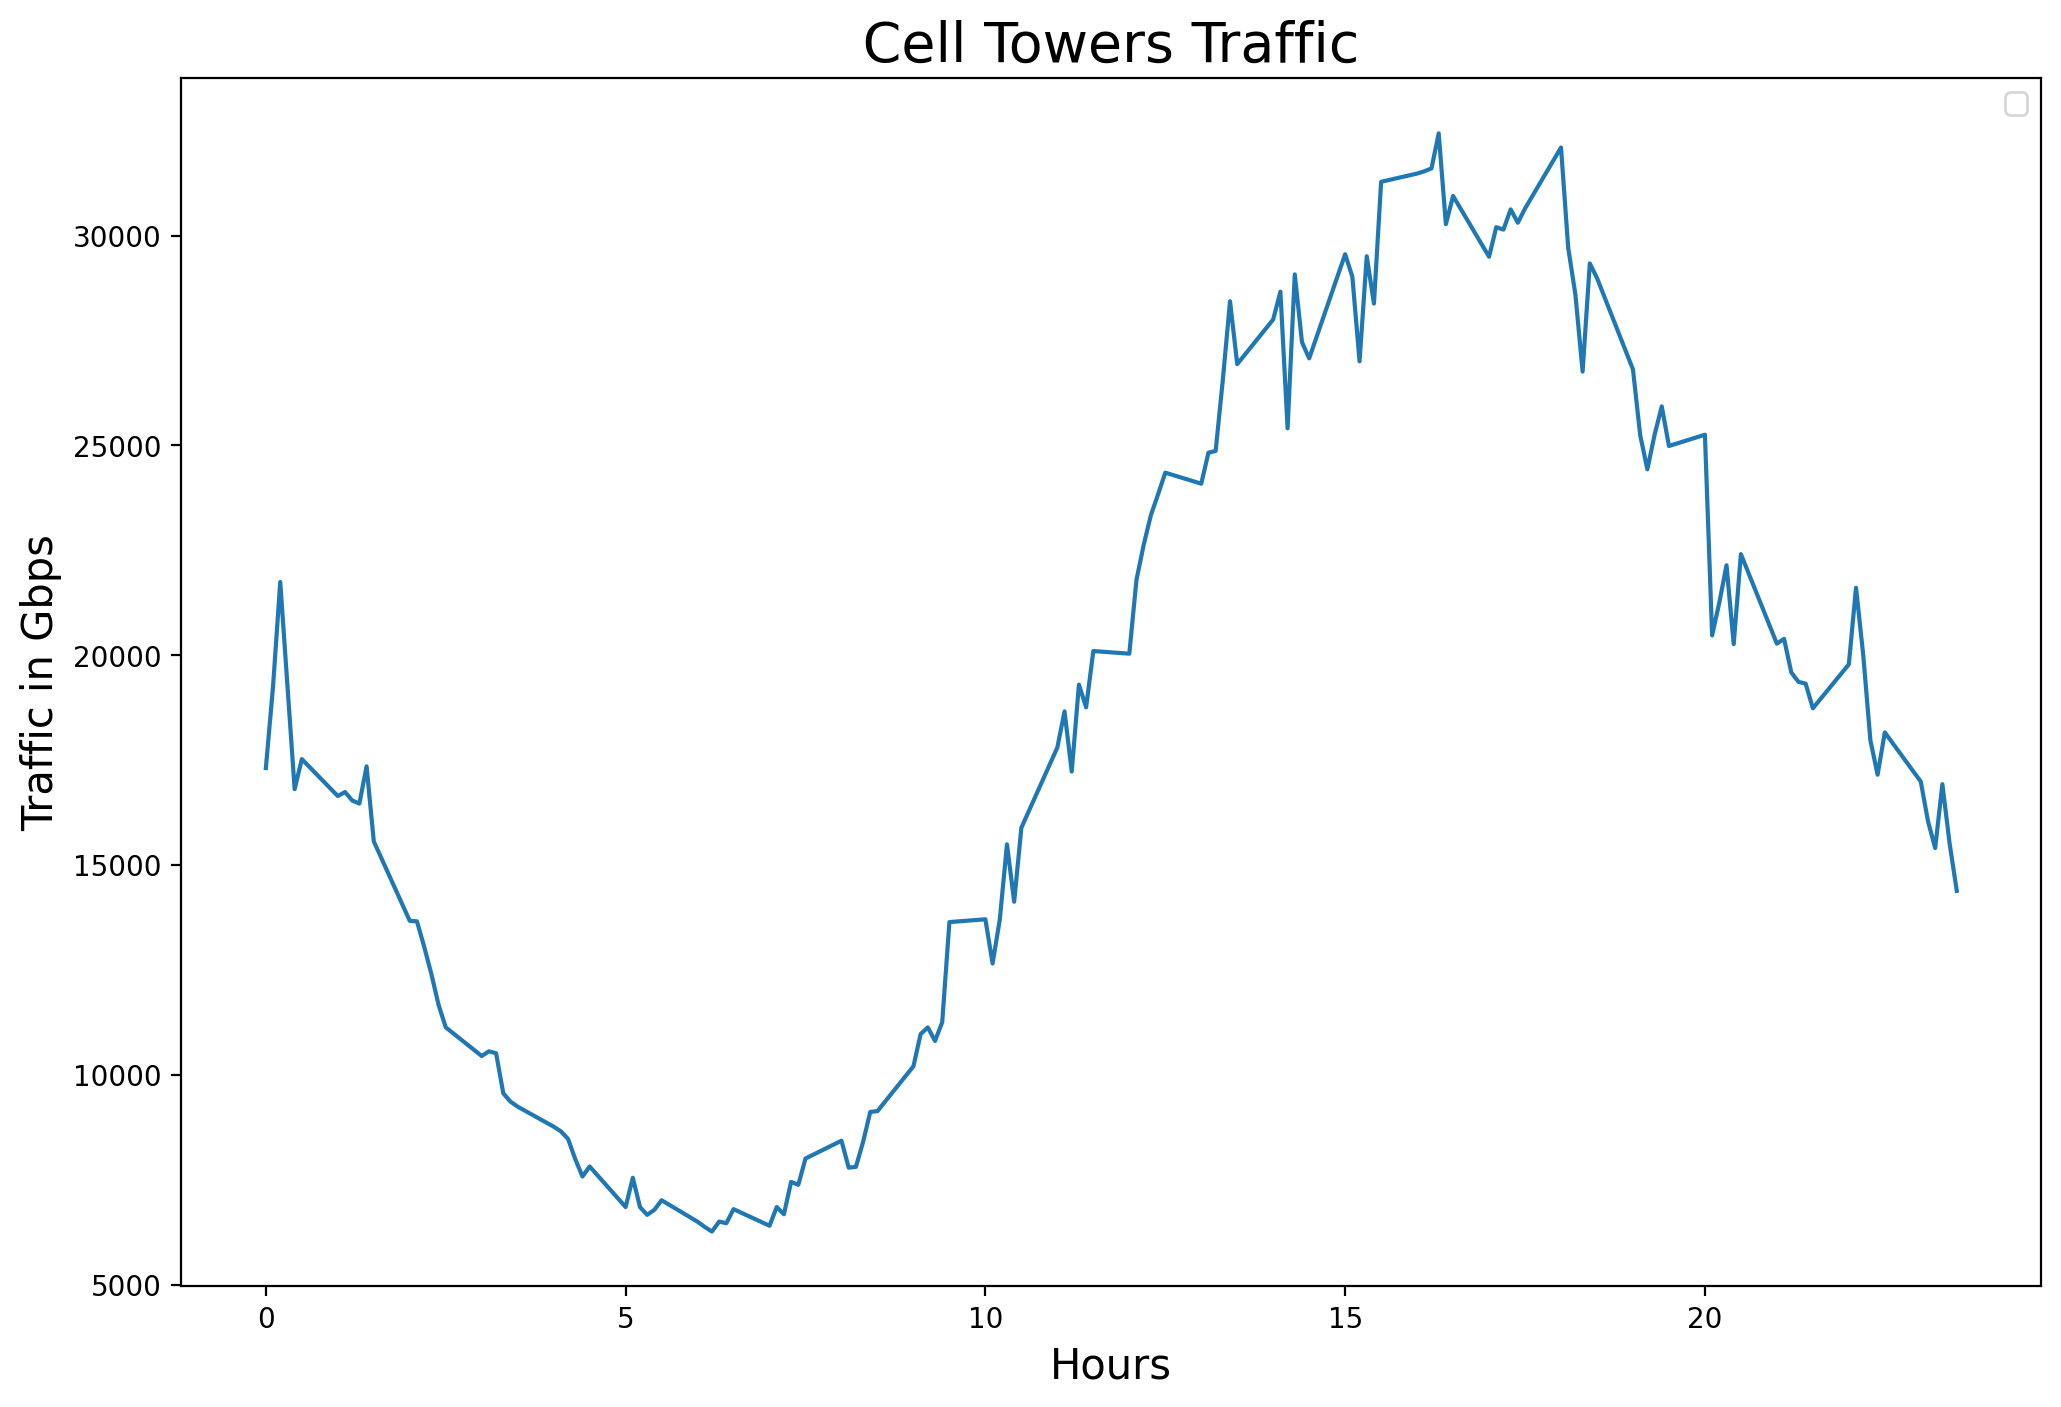

In [134]:
plt.figure(figsize=(12, 8), dpi = 200)
plt.plot(r8['Time_Interval'], r8['Fronthaul_Gbps'])
plt.title(' Cell Towers Traffic ', fontsize = 20)
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Traffic in Gbps', fontsize = 15)
plt.legend()
plt.savefig('linkedin01')

In [123]:
r8.nlargest(1,'Fronthaul_Gbps')

,Time_Interval,Square_id,Country_code,Internet,RRH,Traffic_MB,Traffic_Gbps,Traffic_Mbps,Traffic_fronthaul,Fronthaul_Gbps
99,16.3,61998,468,18245.106859,130962.0,9.122553e+07,1216.340457,1.216340e+06,3.243575e+07,32435.745527


# Finally we have found our first answer! Since teh limit of elastic optical fiber under c-band is 32 Tbps, 12 cell towers can share the same fiber link. However, between 15h and 20h, the traffic will exceed the fiber limit.

# Now, these same cell towers will be used in our neural network model to predict the behavior of the traffic. Please see Source3

In [130]:
df5.to_csv('df5.csv')

In [131]:
df5.groupby(['RRH','Square_id'])['Fronthaul_Gbps'].sum().nlargest(12).reset_index()

,RRH,Square_id,Fronthaul_Gbps
0,20122.0,5161,414210.509030
1,20124.0,5059,280457.422103
2,20209.0,5758,225530.388453
3,351.0,5955,214227.147949
4,3491.0,5061,204875.925058
5,3494.0,5262,192796.390632
6,1098.0,4857,191458.955369
7,14798.0,5162,185031.131786
8,3283.0,4755,181526.728365
9,18716.0,5458,179408.643760


In [132]:
list(df5.groupby(['RRH','Square_id'])['Fronthaul_Gbps'].sum().nlargest(12).reset_index()['Square_id'])

[5161, 5059, 5758, 5955, 5061, 5262, 4857, 5162, 4755, 5458, 4654, 4856]